In [102]:
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
palette = sns.color_palette("colorblind")

from sklearn.linear_model import LogisticRegression

from mpl_toolkits.axisartist.axislines import AxesZero


In [103]:
rng = np.random.default_rng(seed=42)

n = 35
x = rng.normal(size=(n,2))

x = rng.multivariate_normal(mean=[0,0], cov=[[1,-0.5],[-0.5,1]], size=n)


y = (0.05*x[:,0] + x[:,1]) > 0

m = int(0.2*n)
idx = rng.choice(n,m,replace=False)
y[idx] = ~y[idx]

x[x[:,0] > 0.5,1] += 0.1
#x[x[:,1] > 3] = [-2.5, 1.0]
#x[x[:,1] < -2,1] = -1.7

In [104]:
x[:,1] < -2

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [105]:
min(x[:,0]), min(x[:,1]), max(x[:,0]), max(x[:,1])

(-1.8616390043887823,
 -2.0848307206994336,
 1.2791137523254785,
 3.1861509097299066)

In [106]:
shirt_size = 0.1
dress_size = 0.5

In [107]:
lr_ref = LogisticRegression(fit_intercept=False)
lr_ref.fit(x, y)

LogisticRegression(fit_intercept=False)

In [108]:
s = rng.normal(size=n) > 0.5

wrong = (y != lr_ref.predict(x))
s[wrong] = 1

s[x[:,0] > 1] = 1

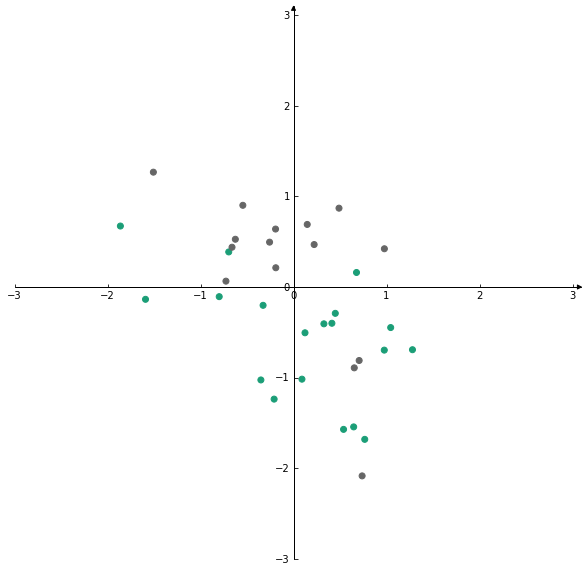

In [109]:

from mpl_toolkits.axisartist.axislines import AxesZero

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(axes_class=AxesZero)

for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")

    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)


# Move left y-axis and bottom x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')


for direction in ["top", "right"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")

plt.xlim(-3, 3)
plt.ylim(-3, 3)
    
plt.scatter(x[:,0], x[:,1], c=y, cmap="Dark2")
plt.show()


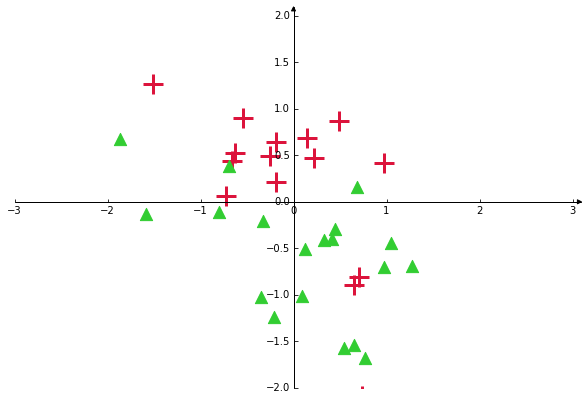

In [110]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(axes_class=AxesZero)

for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")

    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)


# Move left y-axis and bottom x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

ax.set_aspect(1)

for direction in ["top", "right"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")

plt.xlim(-3, 3)
plt.ylim(-2, 2)

plt.scatter(x[y==True, 0], x[y==True, 1], marker="+", color="crimson", s=400, linewidth=3)
plt.scatter(x[y==False, 0], x[y==False, 1], marker="^", color="limegreen", s=150, linewidth=1)
#plt.scatter(x[:,0], x[:,1], c=y, cmap="Dark2", marker=[markers[elt] for elt in y])

plt.savefig("logistic_reg_data.pdf", bbox_inches="tight")
plt.show()


In [111]:
def fit_and_plot(x, y, ref=None, name=None, offset=0):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(axes_class=AxesZero)
    
    for direction in ["xzero", "yzero"]:
        # adds arrows at the ends of each axis
        ax.axis[direction].set_axisline_style("-|>")

        # adds X and Y-axis from the origin
        ax.axis[direction].set_visible(True)

    for direction in ["left", "right", "bottom", "top"]:
        # hides borders
        ax.axis[direction].set_visible(False)


    # Move left y-axis and bottom x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')

    ax.set_aspect(1)

    for direction in ["top", "right"]:
        # adds arrows at the ends of each axis
        ax.axis[direction].set_axisline_style("-|>")

    plt.xlim(-3, 3)
    plt.ylim(-2, 2)

    plt.scatter(x[y==True, 0], x[y==True, 1], marker="+", color="crimson", s=400, linewidth=3)
    plt.scatter(x[y==False, 0], x[y==False, 1], marker="^", color="limegreen", s=150, linewidth=1)
    #plt.scatter(x[:,0], x[:,1], c=y, cmap="Dark2", marker=[markers[elt] for elt in y])

    lr = LogisticRegression(fit_intercept=False)
    lr.fit(x, y)
    w1, w2 = lr.coef_[0,0], lr.coef_[0,1]

    m = -w1/w2 + offset

    xmin, xmax = -5,5
    xd = np.array([xmin, xmax])
    yd = m*xd 

    if ref is not None:
        plt.plot(ref[0], ref[1], color="purple", ls="dashed")
    plt.plot(xd, yd, color="purple", lw=3)

    plt.savefig("logistic_reg_"+name+".pdf", bbox_inches="tight")
    plt.show()

    return xd, yd

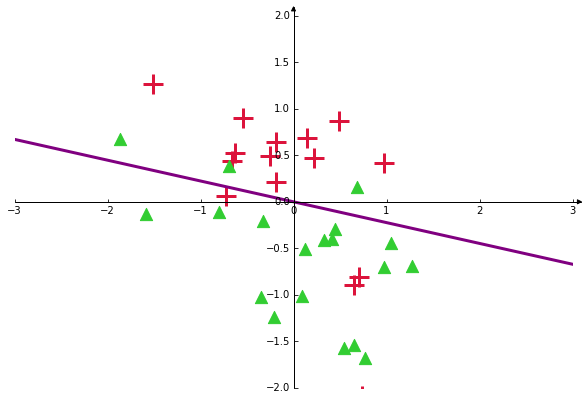

In [112]:
xd, yd = fit_and_plot(x, y, name="base")

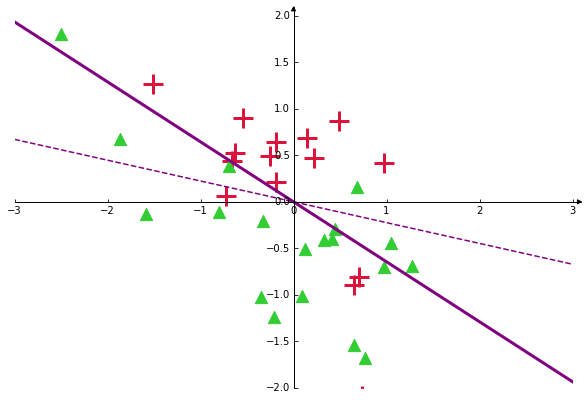

(array([-5,  5]), array([ 3.22441818, -3.22441818]))

In [113]:
x2 = x.copy()
x2[0] = (-2.5, 1.8)

fit_and_plot(x2, y, ref=[xd, yd], name="changed", offset=-0)

In [114]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

shirt_red = plt.imread("shirt_red.png")
dress_red = plt.imread("dress_red.png")
shirt_green = plt.imread("shirt_green.png")
dress_green = plt.imread("dress_green.png")
shirt_gray = plt.imread("shirt_gray.png")
dress_gray = plt.imread("dress_gray.png")
shirt_change = plt.imread("shirt_change.png")
dress_change = plt.imread("dress_change.png")

def plot_images(x, y, image, z, ax=None, alpha=1):
    ax = ax or plt.gca()

    for xi, yi in zip(x,y):
        im = OffsetImage(image, zoom=z, alpha=alpha)#72/ax.figure.dpi)
        im.image.axes = ax

        ab = AnnotationBbox(im, (xi,yi), frameon=False, pad=0.0,)
        
        if yi< 2 and yi > -2:
            ax.add_artist(ab)

def fit_and_plot2(x, y, s, to_plot=[1,2,3,4], ref=None, name=None, show_change=False, offset=0):

    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(axes_class=AxesZero)
    
    alpha = 1 if not show_change else 0.2

    for direction in ["xzero", "yzero"]:
        # adds arrows at the ends of each axis
        ax.axis[direction].set_axisline_style("-|>")

        # adds X and Y-axis from the origin
        ax.axis[direction].set_visible(True)

    for direction in ["left", "right", "bottom", "top"]:
        # hides borders
        ax.axis[direction].set_visible(False)


    # Move left y-axis and bottom x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')

    ax.set_aspect(1)

    for direction in ["top", "right"]:
        # adds arrows at the ends of each axis
        ax.axis[direction].set_axisline_style("-|>")

    plt.xlim(-3, 3)
    plt.ylim(-2, 2)
    
    
    
    lr = LogisticRegression(fit_intercept=False)
    lr.fit(x, y)
    w1, w2 = lr.coef_[0,0], lr.coef_[0,1]

    m = -w1/w2 + offset

    xmin, xmax = -5,5
    xd = np.array([xmin, xmax])
    yd = m*xd 
    

    if 1 not in to_plot:
        plot_images(x[(y==True) & (s==True), 0], x[(y==True) & (s==True), 1], dress_gray, ax=ax, z=dress_size, alpha=alpha)
    if 2 not in to_plot:
        plot_images(x[(y==True) & (s==False), 0], x[(y==True) & (s==False), 1], shirt_gray, ax=ax, z=shirt_size, alpha=alpha)
    if 3 not in to_plot:
        plot_images(x[(y==False) & (s==True), 0], x[(y==False) & (s==True), 1],  dress_gray, ax=ax, z=dress_size, alpha=alpha)
    if 4 not in to_plot:
        plot_images(x[(y==False) & (s==False), 0], x[(y==False) & (s==False), 1],  shirt_gray, ax=ax, z=shirt_size, alpha=alpha)
   
    if 1 in to_plot:
        plot_images(x[(y==True) & (s==True), 0], x[(y==True) & (s==True), 1], dress_red, ax=ax, z=dress_size, alpha=alpha)
    if 2 in to_plot:
        plot_images(x[(y==True) & (s==False), 0], x[(y==True) & (s==False), 1], shirt_red, ax=ax, z=shirt_size, alpha=alpha)
    if 3 in to_plot:
        plot_images(x[(y==False) & (s==True), 0], x[(y==False) & (s==True), 1],  dress_green, ax=ax, z=dress_size, alpha=alpha)
    if 4 in to_plot:
        plot_images(x[(y==False) & (s==False), 0], x[(y==False) & (s==False), 1],  shirt_green, ax=ax, z=shirt_size, alpha=alpha)
    #plt.scatter(x[:,0], x[:,1], c=y, cmap="Dark2", marker=[markers[elt] for elt in y])

    
    
    if ref is not None:
        pred1 = lr.predict(x)
        pred2 = lr_ref.predict(x)
        print(pred1)
        print(pred2)
        
        print(pred1!=pred2)
        
        c = (pred1 != pred2)
        
        plt.plot(ref[0], ref[1], color="purple", ls="dashed", lw=3, zorder=10000)
        
        
        
        if show_change:
            plot_images(x[(c==True) & (s==True), 0], x[(c==True) & (s==True), 1],  dress_change, ax=ax, z=dress_size)
            plot_images(x[(c==True) & (s==False), 0], x[(c==True) & (s==False), 1],  shirt_change, ax=ax, z=shirt_size)
        
            
        
    plt.plot(xd, yd, color="purple", lw=3, zorder=10000)

    plt.tight_layout()
    plt.savefig("logistic_reg_"+name+".pdf", bbox_inches="tight")
    plt.show()

    return xd, yd

[False  True  True False False False False  True False  True  True False
 False False False  True  True False False False  True False False  True
  True False  True  True False False False  True False  True  True]
[ True False  True False  True False False False False  True  True False
 False False False  True  True False False False  True False False  True
  True False  True  True  True False False  True False  True  True]
[ True  True False False  True False False  True False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False]


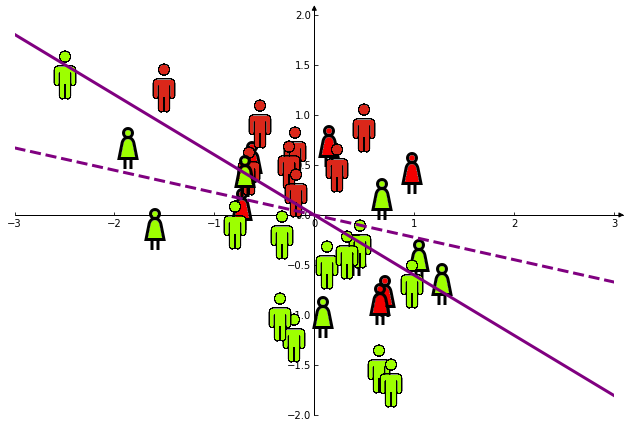

(array([-5,  5]), array([ 3.01214367, -3.01214367]))

In [115]:
x2 = x.copy()
x2[0] = (-2.5, 1.4)

fit_and_plot2(x2, y, s, ref=[xd, yd], name="changed_fair")

[False  True  True False False False False  True False  True  True False
 False False False  True  True False False False  True False False  True
  True False  True  True False False False  True False  True  True]
[ True False  True False  True False False False False  True  True False
 False False False  True  True False False False  True False False  True
  True False  True  True  True False False  True False  True  True]
[ True  True False False  True False False  True False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False]


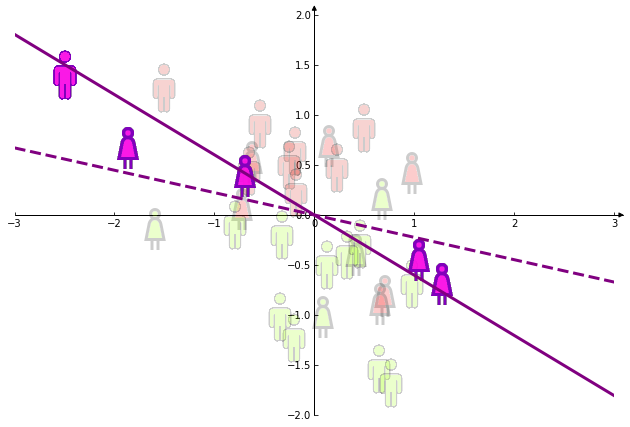

(array([-5,  5]), array([ 3.01214367, -3.01214367]))

In [116]:
x2 = x.copy()
x2[0] = (-2.5, 1.4)

fit_and_plot2(x2, y, s, ref=[xd, yd], name="changed_fair_highlight", show_change=True)

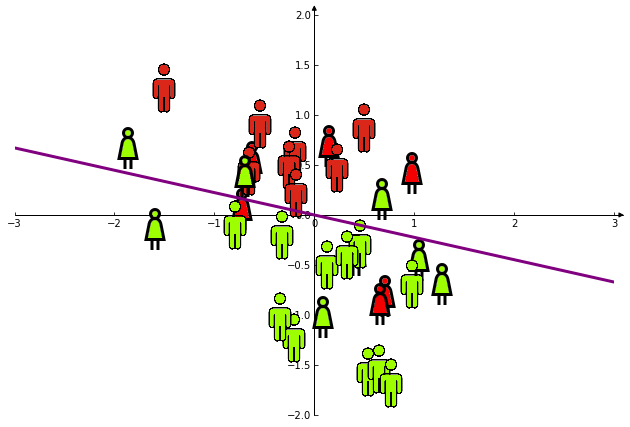

(array([-5,  5]), array([ 1.11888961, -1.11888961]))

In [117]:
x2 = x.copy()
x2[0] = (-3.8, 2.8)

fit_and_plot2(x, y, s, name="base_fair")

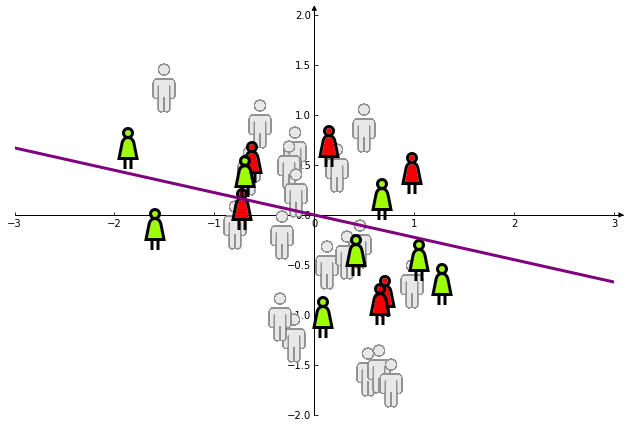

(array([-5,  5]), array([ 1.11888961, -1.11888961]))

In [118]:
x2 = x.copy()
x2[0] = (-3.8, 2.8)

fit_and_plot2(x, y, s, to_plot=[1,3], name="base_dress")

In [119]:
(s == True).sum(), (s == False).sum()

(16, 19)

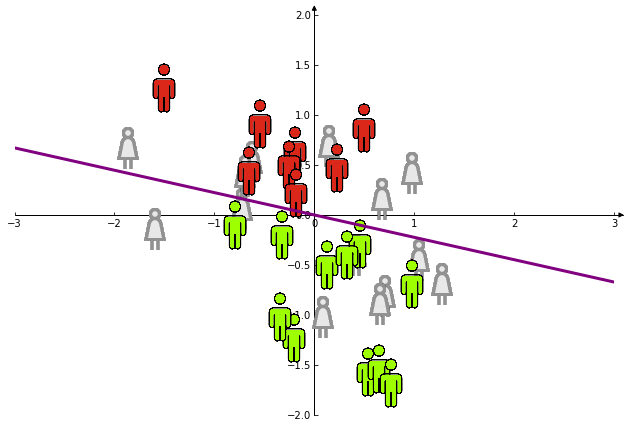

(array([-5,  5]), array([ 1.11888961, -1.11888961]))

In [120]:
x2 = x.copy()
x2[0] = (-3.8, 2.8)

fit_and_plot2(x, y, s, to_plot=[2,4], name="base_shirt")

# Conditioning

In [121]:
a, b, c = 0.05, 1, 0.3
lbd = 0

def f(X,Y):
    return a * X**2 + b * Y ** 2 + c * X * Y + lbd * (X**2 + Y**2)

def grad(x, y):
    return np.array([2 * a * x + c * y + 2 * lbd * x, 2 * b * y + c * x + 2 * lbd * y])

In [122]:
M = np.array([[a, c/2], [c/2, b]])
M += np.diag([lbd, lbd])
mu, L = np.linalg.eigvals(2*M)
Ms = np.array([2 * a + 2 * lbd, 2 * b + 2 * lbd])

In [123]:
mu2, L2 = np.linalg.eigvals(2*M*Ms)

In [124]:
mu, L, Ms

(0.05375705774143613, 2.046242942258564, array([0.1, 2. ]))

In [125]:
mu2, L2

(0.005493810962316381, 4.004506189037683)

In [126]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.cm as cm

delta = 0.025
x = np.arange(-np.sqrt(25.0/a), 4*np.sqrt(13.0/a), delta)
y = np.arange(-np.sqrt(25.0/b), 4*np.sqrt(13.0/b), delta)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

In [127]:
f(-35, 4)

35.25

(-4.69041575982343, 3.3166247903554)

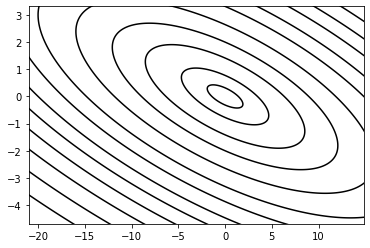

In [128]:
fig, ax = plt.subplots()

levels = [0.1, 0.6, 2, 4, 7, 11, 15, 20, 25, 31, 38, 47, 58]

CS = ax.contour(X, Y, Z, levels=levels, colors="black")
ax.set_xlim(-np.sqrt(22/a),np.sqrt(11/a))
ax.set_ylim(-np.sqrt(22/b),np.sqrt(11/b))
#ax.set_aspect(1)
#ax.clabel(CS, inline=True, fontsize=10)
#ax.set_title('Simplest default with labels')

In [129]:
def gd(f, grad, w0, rng, eta=0.1, T=10, sigma=1):
    w = w0.copy()
    
    ws = np.zeros((T+1,2))
    ws[0] = w.copy()
    
    for t in range(1,T+1):
        w -= eta * (grad(w[0], w[1]) + rng.normal(scale=sigma, size=2))
        ws[t] = w.copy()
        
    return ws

In [130]:
def cd(f, grad, w0, rng, eta=None, T=10, sigma=1):
    w = w0.copy()
    
    ws = np.zeros((T+1,2))
    ws[0] = w.copy()
    
    j = 0
    
    for t in range(1,T+1):
        j = (j+1) % 2
        
        w[j] -= eta[j] * (grad(w[0], w[1])[j] + rng.normal(scale=sigma))
        ws[t] = w.copy()
        
    return ws

In [131]:
def gcd(f, grad, w0, rng, eta=None, T=10, sigma=1):
    w = w0.copy()
    
    ws = np.zeros((T+1,2))
    ws[0] = w.copy()
    
    j = 0
    
    for t in range(1,T+1):
        g = grad(w[0], w[1]) + rng.normal(scale=sigma, size=2)
        
        j = np.argmax(np.sqrt(eta) * np.abs(g))
        
        w[j] -= eta[j] * g[j]
        ws[t] = w.copy()
        
    return ws

In [132]:
rng = np.random.default_rng(seed=42)
sigma = 1/2
ws = gd(f, grad, np.array([32.,0.]), rng=rng, eta=0.5/L, T=15, sigma=sigma)
ws2 = gd(f, grad, np.array([32.,0.]), rng=rng, eta=0.5/Ms, T=30, sigma=sigma)
wscd = cd(f, grad, np.array([32.,0.]), rng=rng, eta=0.5/Ms, T=50, sigma=sigma)
wsgcd = gcd(f, grad, np.array([32.,0.]), rng=rng, eta=0.5/Ms, T=10, sigma=sigma/3)

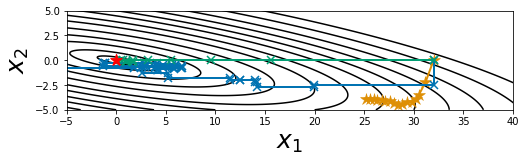

In [133]:
fig, ax = plt.subplots(figsize=(8,4))
CS = ax.contour(X, Y, Z, levels=levels, colors="black")
ax.set_xlim(-5,40)
ax.set_ylim(-5,5)
ax.set_aspect(1)

ax.plot(ws[:,0], ws[:,1], marker="*", markersize=12, markeredgewidth=0.5, linewidth=2, color=palette[1])
ax.scatter([0], [0], marker="*", color="red", s=150, zorder=1000)


ax.set_xlabel("$x_1$", fontsize=25)
ax.set_ylabel("$x_2$", fontsize=25)

plt.savefig("1.pdf", bbox_inches="tight")

ax.plot(wscd[:,0], wscd[:,1], marker="x", markersize=8, markeredgewidth=1.5, linewidth=2, color=palette[0])

plt.savefig("2.pdf", bbox_inches="tight")

ax.plot(wsgcd[:,0], wsgcd[:,1], marker="x", markersize=8, markeredgewidth=1.5, linewidth=2, color=palette[2])


plt.savefig("3.pdf", bbox_inches="tight")

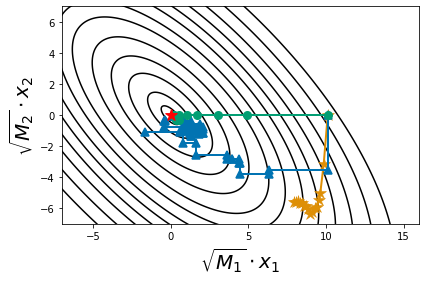

In [134]:
fig, ax = plt.subplots(figsize=(8,4))
CS = ax.contour(X*np.sqrt(Ms[0]), Y*np.sqrt(Ms[1]), Z, levels=levels, colors="black")

ax.set_xlim(-7, 16)
ax.set_ylim(-7, 7)
ax.set_aspect(1)

Ms_old = Ms.copy()
Ms = Ms_old

ax.plot(np.sqrt(Ms[0])*ws[:,0], np.sqrt(Ms[1])*ws[:,1], marker="*", markersize=12, markeredgewidth=0.5, linewidth=2, color=palette[1])
ax.scatter([0], [0], marker="*", color="red", s=150, zorder=1000)

ax.set_xlabel("$\sqrt{M_1} \cdot x_1$", fontsize=20)
ax.set_ylabel("$\sqrt{M_2} \cdot x_2$", fontsize=20)

plt.savefig("1_scaled.pdf", bbox_inches="tight")

ax.plot(np.sqrt(Ms[0])*wscd[:,0], np.sqrt(Ms[1])*wscd[:,1], marker="^", markersize=8, markeredgewidth=1.5, linewidth=2,color=palette[0])
plt.savefig("2_scaled.pdf", bbox_inches="tight")

ax.plot(np.sqrt(Ms[0])*wsgcd[:,0], np.sqrt(Ms[1])*wsgcd[:,1], marker=".", markersize=15, markeredgewidth=1.5, linewidth=2, color=palette[2])


#ax.plot(np.sqrt(Ms[0])*ws2[:,0], np.sqrt(Ms[1])*ws2[:,1], color=palette[3], marker="x", markersize=8, markeredgewidth=1.5, linewidth=2)

plt.savefig("3_scaled.pdf", bbox_inches="tight")
#ax.clabel(CS, inline=True, fontsize=10)
#ax.set_title('Simplest default with labels')



In [135]:
Ms

array([0.1, 2. ])

# Gradients

In [277]:
n = 15
rng = np.random.default_rng(seed=42)
grad = rng.lognormal(sigma=2, size=n)
grad *= -np.sign(rng.normal(size=n))
grad /= np.linalg.norm(grad)

noise = rng.normal(scale=0.5, size=n)

noise_easy = noise * np.abs(grad) / 2#rng.normal(scale=np.abs(grad) * np.sqrt(n), size=n)


In [278]:
def plot_grad_noise(grad, noise, color=None, name=None):
    
    if color is None:
        c = [True] * len(grad)
    else:
        c = np.array([False] * len(grad))
        c[color] = True
        
    ax = plt.subplot(111, axes_class=AxesZero)

    # Hide the right and top spines
    ax.spines[['right', 'top']].set_visible(False)

    for direction in ["left", "right", "bottom", "top"]:
        # hides borders
        ax.axis[direction].set_visible(False)

    ax.bar(np.arange(n) + 1 , grad, color="lightgray", edgecolor="black")
    ax.bar(np.arange(n)[c] + 1 , grad[c], color="purple", edgecolor="black")



    for direction in ["xzero", "yzero"]:
        # adds arrows at the ends of each axis
        ax.axis[direction].set_axisline_style("-|>")
        

        # adds X and Y-axis from the origin
        ax.axis[direction].set_visible(True)


    ax.spines['bottom'].set_position("zero")
    
    if noise is not None:
        for j, gj in enumerate(grad):
            arrow_color = "red" if c[j]  else "lightgray"
            offset = -0.01 if noise[j] < 0 else 0
            
            ax.arrow(x=j+1, y=gj+offset, dx=0, dy=noise[j], width=.4, facecolor=arrow_color, edgecolor='black',
                 length_includes_head=False, head_length=0.1, head_width=0.8) 

    
    ax.set_ylim(-1.3, 1.5)
    
    
    ax.xaxis.set_label_coords(1.05, -0.025)
    plt.tight_layout()
    
    ax.text(-2.2, -0.7, "Gradient entry", fontsize=20, rotation=90)
    ax.text(13, 0.1, 'Coordinate', fontsize=20)

    
    if name is not None:
        plt.savefig(name + ".pdf", bbox_inches="tight")

    #ax.set_xlabel("Coordinate $j$")
    #ax.set_ylabel("$\\nabla_j f$", labelpad=0, fontsize=1000)



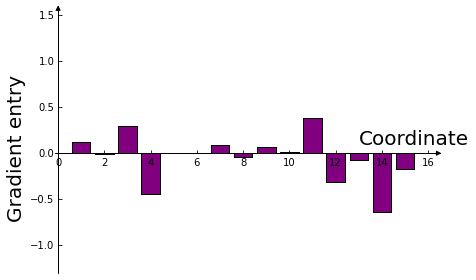

In [279]:
plot_grad_noise(grad, None, name="normal_grad_nonoise")

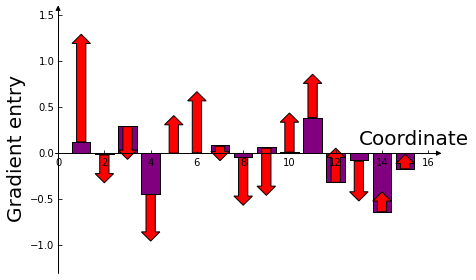

In [280]:
plot_grad_noise(grad, noise, name="normal_grad")

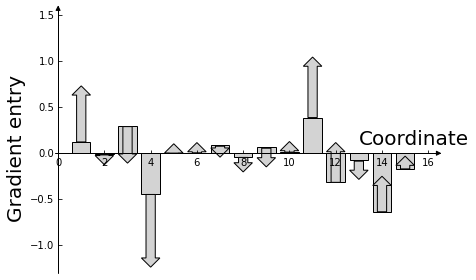

In [281]:
plot_grad_noise(grad, noise * np.abs(grad) * np.sqrt(15), name="normal_grad_gray", color=[])

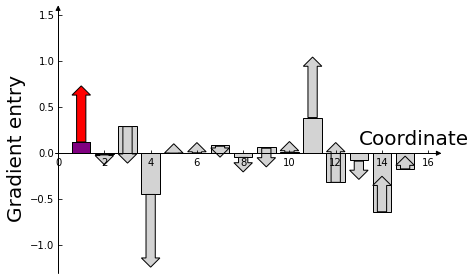

In [282]:
plot_grad_noise(grad, noise * np.abs(grad) * np.sqrt(15), name="normal_grad_0", color=[0])

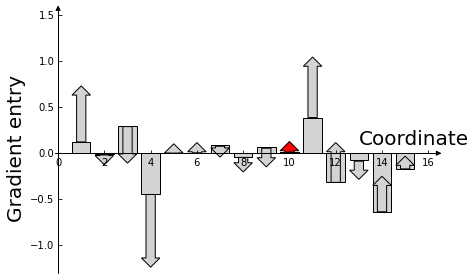

In [283]:
plot_grad_noise(grad, noise * np.abs(grad) * np.sqrt(15), name="normal_grad_10", color=[9])

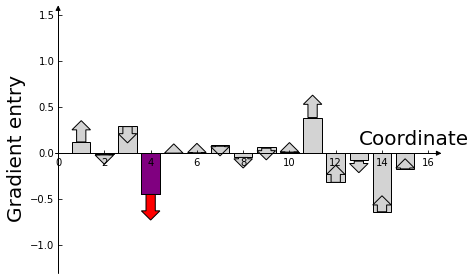

In [284]:
plot_grad_noise(grad, noise * np.abs(grad), name="normal_grad_greedy", color=[3])

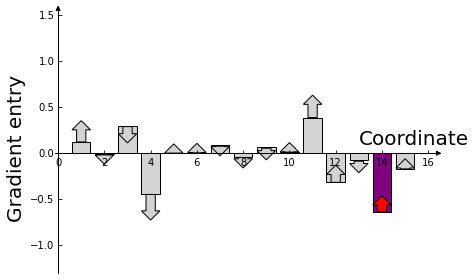

In [285]:
plot_grad_noise(grad, noise * np.abs(grad), name="normal_grad_greedy2", color=[13])

In [286]:
## ax = plt.subplot(111, axes_class=AxesZero)

# Hide the right and top spines
ax.spines[['right', 'top']].set_visible(False)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)

plt.bar(np.arange(n) + 1 , grad, color="purple", edgecolor="black")



for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")

    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)


ax.spines['bottom'].set_position("zero")

#ax.set_xlabel("Coordinate $j$")
#ax.set_ylabel("$\\nabla_j f$", labelpad=0, fontsize=1000)



TypeError: 'method' object is not subscriptable

In [287]:
def plot_grad_bar(grad, noise_gd, noise_cd, name, plot_easy=False):
    fig = plt.figure(figsize=(5,3))
    ax = plt.subplot(111, axes_class=AxesZero)

    # Hide the right and top spines
    ax.spines[['right', 'top']].set_visible(False)

    for direction in ["left", "right", "bottom", "top"]:
        # hides borders
        ax.axis[direction].set_visible(False)

    plt.bar(np.arange(n) +1 , grad, color="purple", edgecolor="black")


    for direction in ["xzero", "yzero"]:
        # adds arrows at the ends of each axis
        ax.axis[direction].set_axisline_style("-|>")

        # adds X and Y-axis from the origin
        ax.axis[direction].set_visible(True)


    ax.spines['bottom'].set_position("zero")

    #add arrow to plot
    for j, gj in enumerate(grad):
        plt.arrow(x=j+1, y=gj, dx=0, dy=noise_gd[j], width=.4, facecolor='red', edgecolor='black',
                 length_includes_head=False, head_length=0.1, head_width=1) 


        
    ax.set_ylim(min(grad), max(grad))
    
    ax.set_xticks(np.arange(1,16))

    plt.ylabel("$\\nabla_j$")
    plt.savefig("grad_" + name + ".pdf", bbox_inches="tight")

    for j, gj in enumerate(grad):
        plt.arrow(x=j+1, y=gj, dx=0, dy=noise_cd[j], width=.4, facecolor='green', edgecolor='black',
                  length_includes_head=False, head_length=0.1, head_width=1, alpha=0.5) 
    
        plt.savefig("grad_easy_" + name + ".pdf", bbox_inches="tight")
    

In [288]:
rng = np.random.default_rng(seed=123)
X = rng.normal(size=(1000,15))
X *= rng.lognormal(sigma=1, size=15)
w_true = rng.normal(scale=5, size=15)
y = X@w_true + rng.normal(scale=0.5, size=1000)


C = 1
M = np.linalg.norm(X.T@X, ord=2)/1000
Ms = np.linalg.norm(X, axis=0)**2/1000
Cs = np.sqrt(Ms/np.sum(Ms)) * C

loss = lambda w: 0.5 * np.linalg.norm( X@w - y ) ** 2
grad = lambda w: X.T@(X@w-y)

def grad(w):
    g = X.T@(X@w-y)
    return g / np.linalg.norm(g)


noise_base = rng.normal(scale=1, size=15)
noise_gd = C * noise_base
noise_cd = Cs * noise_base * 15

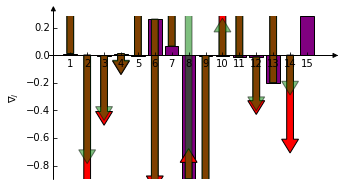

In [259]:
w = np.zeros(15)
plot_grad_bar(grad(w), noise_gd, noise_cd, "full", plot_easy=True)

In [260]:
min(grad(w)), max(grad(w))

(-0.8963022956206407, 0.2884386190629034)

In [261]:
Ms, np.linalg.norm(X[:,0]**2/1000)

(array([1.43869668e+00, 4.09376646e-01, 6.51766366e-01, 6.47551567e-01,
        5.18076485e-01, 1.29399813e+01, 1.07254798e+01, 1.14444919e+02,
        4.79380751e-01, 4.56726319e-02, 6.10154876e-01, 6.51755977e-01,
        1.53150854e+01, 7.50108955e-02, 1.69721185e+01]),
 0.0821849874549149)

In [262]:
M, Ms, np.linalg.norm(Ms)

(114.53286850870758,
 array([1.43869668e+00, 4.09376646e-01, 6.51766366e-01, 6.47551567e-01,
        5.18076485e-01, 1.29399813e+01, 1.07254798e+01, 1.14444919e+02,
        4.79380751e-01, 4.56726319e-02, 6.10154876e-01, 6.51755977e-01,
        1.53150854e+01, 7.50108955e-02, 1.69721185e+01]),
 117.92840107762669)

In [263]:
noise_base = rng.normal(size=15)
noise_gd = 1.0/M * noise_base * C
noise_cd = 1.0/Ms * noise_base * Cs

<StemContainer object of 3 artists>

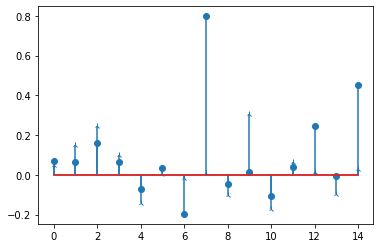

In [264]:
plt.stem(grad(w_true))
plt.stem((1.0/Ms * grad(w_true)), markerfmt="2")

In [265]:
plt.stem?

<StemContainer object of 3 artists>

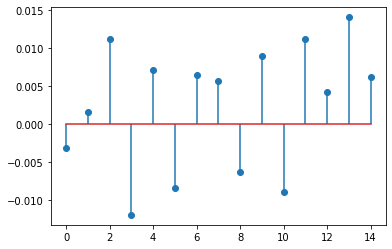

In [266]:
plt.stem(1.0/M * grad(w_true) + noise_gd)

In [267]:
grad(w_true)/M, grad(w_true)/Ms/15

(array([ 6.01571029e-04,  5.42923111e-04,  1.40518664e-03,  5.56904826e-04,
        -6.38080209e-04,  2.91013144e-04, -1.72014241e-03,  6.96529898e-03,
        -4.23181805e-04,  1.21714775e-04, -9.14271043e-04,  3.52058035e-04,
         2.14436040e-03, -6.17662857e-05,  3.94577398e-03]),
 array([ 0.00319269,  0.01012638,  0.01646194,  0.00656667, -0.00940417,
         0.00017172, -0.00122458,  0.00046471, -0.00674039,  0.02034821,
        -0.01144126,  0.00412447,  0.0010691 , -0.00628733,  0.00177515]))